In [1]:
# Importing the needed libraries
from ast import increment_lineno
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting/loading data
dataset = pd.read_excel('XLSX/googleplaystore 2.xlsx')
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,2017-01-20 00:00:00,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19 00:00:00,Varies with device,Varies with device


In [83]:
# Checking the first five fields of the dataframe
dataset.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up


In [84]:
# Inspecting data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [85]:
# Inspecting missing values
dataset.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [86]:
# Dropping few null rows 
dataset = dataset.dropna(subset = ['Type', 'Content Rating', 'Current Ver', 'Android Ver'])

In [87]:
# Inspecting missing values
dataset.isna().sum()

App                  0
Category             0
Rating            1469
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [88]:
# Handling missing data
dataset['Rating'] = dataset['Rating'].fillna('Not specified')
dataset['Price'] = dataset['Price'].fillna(0)

In [89]:
# Inspecting missing values
dataset.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [90]:
# Checking the first five fields of the dataframe
dataset.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,2018-04-26 00:00:00,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,2018-06-14 00:00:00,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,2017-09-20 00:00:00,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,2018-07-03 00:00:00,2.8,4.0.3 and up


Checking For Unique values

In [91]:
dataset['Reviews'].unique()

array([159, 967, 87510, ..., 603, 1195, 398307], dtype=object)

In [92]:
dataset['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [93]:
dataset['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [94]:
dataset['Price'].unique()

array([0, '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Cleaning data in columns

In [95]:
dataset['Size'] = dataset['Size'].str.strip('M')
dataset['Size'] = dataset['Size'].str.strip('k')

In [96]:
dataset['Price'] = dataset['Price'].str.strip('$')

In [97]:
dataset['Installs'] = dataset['Installs'].str.strip('+')
dataset['Installs'] = dataset['Installs'].str.strip(',')

In [98]:
dataset.drop(dataset.index[dataset['Size'] == 'Varies with device'], inplace = True)

Converting data in columns to the appropriate types

In [99]:
dataset['Reviews'] = dataset['Reviews'].astype('int')

In [100]:
dataset['Size'] = dataset['Size'].str.strip(' ').astype('float')

In [101]:
dataset['Price'] = dataset['Price'].astype('float')

In [102]:
dataset['Installs'] = dataset['Installs'].str.replace(',', '').astype('int')

In [103]:
dataset['Last Updated'] = pd.to_datetime(dataset['Last Updated'], format='mixed') 

In [104]:
# Checking datatypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9135 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9135 non-null   object        
 1   Category        9135 non-null   object        
 2   Rating          9135 non-null   object        
 3   Reviews         9135 non-null   int32         
 4   Size            9135 non-null   float64       
 5   Installs        9135 non-null   int32         
 6   Type            9135 non-null   object        
 7   Price           721 non-null    float64       
 8   Content Rating  9135 non-null   object        
 9   Genres          9135 non-null   object        
 10  Last Updated    9135 non-null   datetime64[ns]
 11  Current Ver     9135 non-null   object        
 12  Android Ver     9135 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(8)
memory usage: 927.8+ KB


In [105]:
# Calculating the descriptive statistics for the numerical columns
dataset.describe()

,Reviews,Size,Installs,Price,Last Updated
count,9.135000e+03,9135.000000,9.135000e+03,721.000000,9135
mean,2.493186e+05,36.947499,7.122458e+06,15.017420,2017-10-24 00:32:18.916256256
min,0.000000e+00,1.000000,0.000000e+00,0.990000,2010-05-21 00:00:00
25%,2.200000e+01,5.600000,1.000000e+03,1.490000,2017-07-23 00:00:00
50%,7.420000e+02,15.000000,1.000000e+05,2.990000,2018-04-27 00:00:00
75%,2.516900e+04,34.000000,1.000000e+06,4.990000,2018-07-16 00:00:00
max,4.489389e+07,1020.000000,1.000000e+09,400.000000,2018-08-08 00:00:00
std,1.717130e+06,98.669772,4.621827e+07,60.145627,NaN


Univariate Analysis

In [106]:
dataset['Reviews'].value_counts()

Reviews
0         556
1         267
2         212
3         173
4         133
         ... 
6626        1
10796       1
273994      1
29203       1
398307      1
Name: count, Length: 4678, dtype: int64

In [107]:
dataset.drop(dataset.index[dataset['Rating'] == 'Not specified'], inplace = True)

In [108]:
dataset['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4.0, 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8, 2.7,
       1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2],
      dtype=object)

<Axes: ylabel='Frequency'>

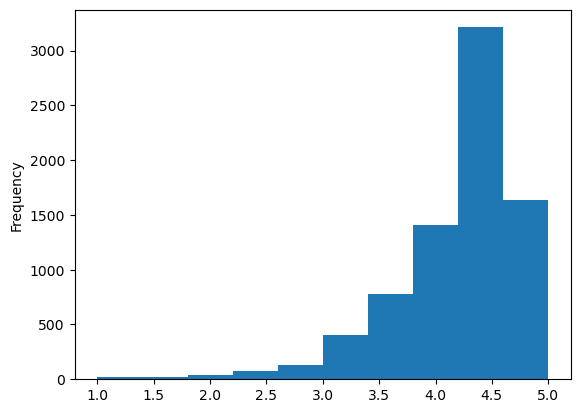

In [109]:
# Visualizing distribution of Rating
plt.figure()
dataset['Rating'].plot.hist()

<Axes: >

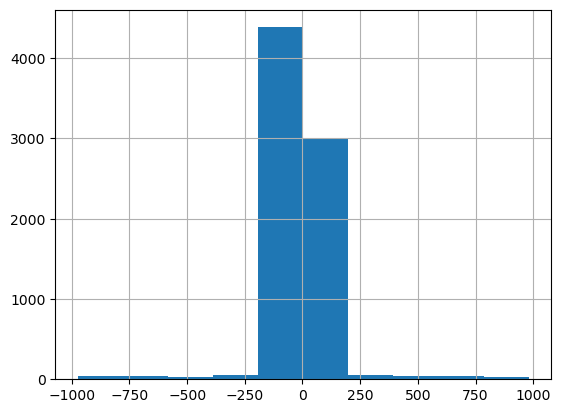

In [110]:
# Visualizing distribution of size
plt.figure()
dataset['Size'].diff().hist()

<Axes: xlabel='Category', ylabel='Count'>

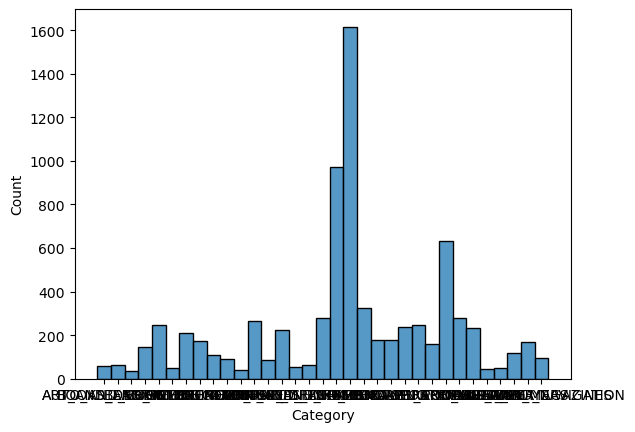

In [111]:
# Visualizing distribution of category
sns.histplot(data=dataset, x='Category')

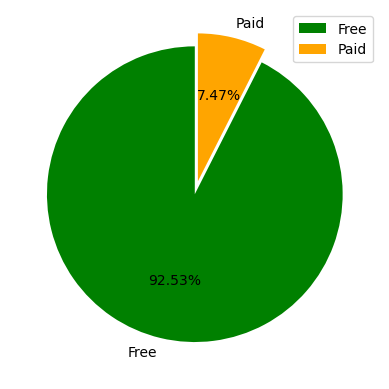

In [112]:
# Visualizing distribution of Type
plt.pie(dataset['Type'].value_counts(),
        labels = dataset['Type'].value_counts().index, autopct='%.2f%%', explode = [0, 0.09],
        colors=['green', 'orange'], startangle=90
       )
plt.legend()

<Axes: xlabel='Content Rating', ylabel='Count'>

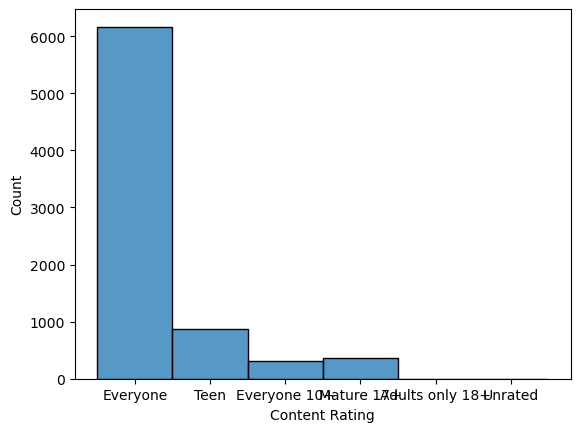

In [113]:
# Visualizing distribution of Content Rating
sns.histplot(data=dataset, x='Content Rating')

Bivariate Analysis

<Axes: xlabel='Rating', ylabel='Reviews'>

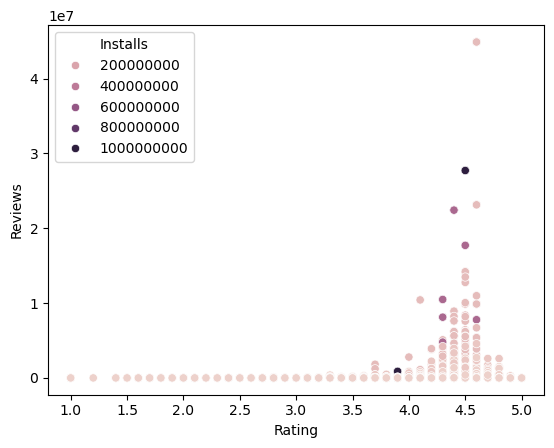

In [114]:
# Exploring relationship between Rating, Reviews and Installs
sns.scatterplot(data=dataset, x='Rating', y='Reviews', hue='Installs')

In [115]:
# Extracting the needed data from the Type column
df = dataset[dataset['Type'] == 'Paid']
df["Type"]

234      Paid
235      Paid
290      Paid
291      Paid
477      Paid
         ... 
10690    Paid
10697    Paid
10760    Paid
10782    Paid
10785    Paid
Name: Type, Length: 577, dtype: object

<Axes: xlabel='Price', ylabel='Rating'>

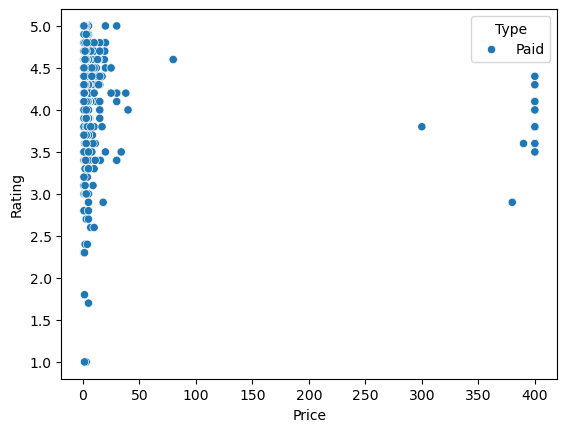

In [116]:
# Exploring relationship between Price, Rating and Paid Types
sns.scatterplot(data=dataset, x='Price', y='Rating', hue=df['Type'])

<Axes: xlabel='Category', ylabel='Rating'>

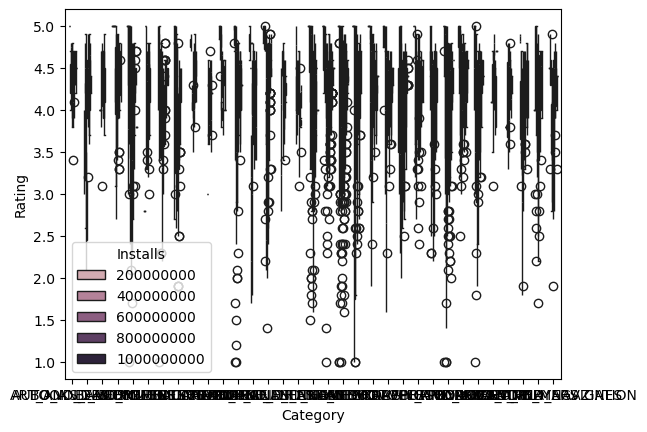

In [117]:
# Exploring relationship between Category,Rating and Installs
sns.boxplot(data=dataset, x='Category', y='Rating', hue='Installs')

<Axes: xlabel='Size', ylabel='Installs'>

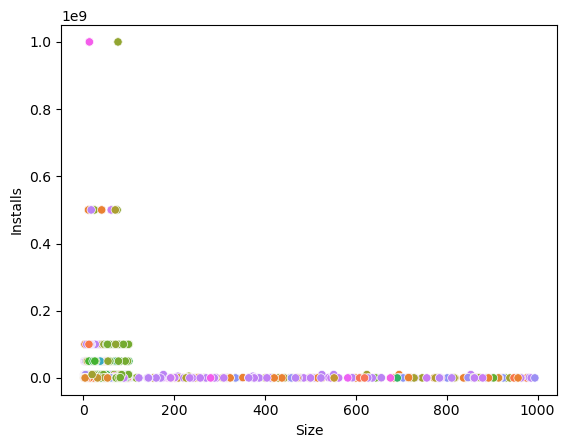

In [118]:
# Exploring relationship between Size, Installs and Genres
sns.scatterplot(data=dataset, x='Size', y='Installs', hue='Genres', legend=False)

Summary

The data gotten from the spreadsheet consisted some missing data possibly due typographical error.
The maximum size of apps is 994 and the minimum is 1.0.
The maximum reviews of apps is 44893888 and the minimum is 1.0. 
